# Laboratorio 3 - Data Science

Integrantes:
    
- Juan Diego Avila 20090
- Diego Franco 20240

## Ejercicio 1


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

test = pd.read_csv('./data/test.csv', delimiter=',')
train = pd.read_csv('./data/train.csv', delimiter=',')


X = train.drop(columns='label').values
y = train['label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Analisis exploratorio

In [3]:
print(train.shape)

(42000, 785)


In [4]:
# ver si hay nan
print(train.isnull().sum())

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64


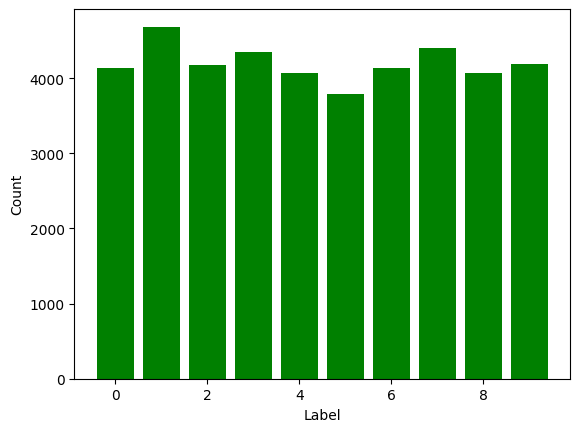

In [5]:
from matplotlib import pyplot as plt

dict = {}

for i in train['label']:
    if i in dict:
        dict[i] += 1
    else:
        dict[i] = 1

plt.bar(dict.keys(), dict.values(), color='g')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()


Se puede ver que esta balanceada la cantidad de datos de cada clase, por lo que no es necesario hacer un balanceo de datos.

### Red neuronal simple

In [6]:



param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)]
}

model = MLPClassifier(max_iter=1000, random_state=42)

grid_search = GridSearchCV(model, param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_


print("Mejores hiperparámetros:", best_params)


Mejores hiperparámetros: {'hidden_layer_sizes': (50, 50)}


Accuracy:  0.9530952380952381


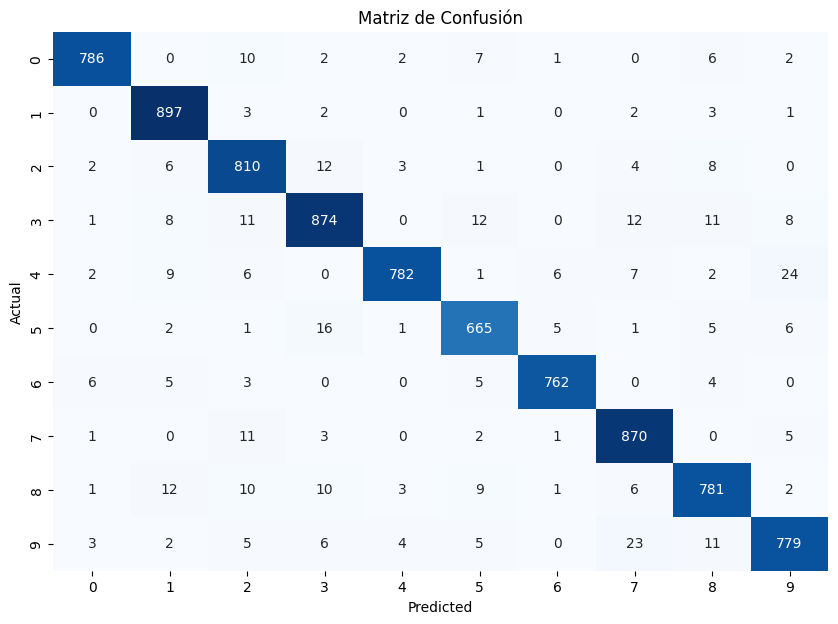

In [7]:
y_pred = best_model.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, y_pred))

# Crear una matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Mostrar la matriz de confusión utilizando seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Matriz de Confusión")
plt.show()

Como se puede ver el modelo utilizando hidden_layer_sizes = (50,50) tiene un buen accuracy con 0.95. La matriz de confusion muestra que el modelo predice bien en casi todos los casos, pero se equivoca mas prediciendo el 7, 8 y 3.

### Deep Learning

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.utils import to_categorical


X = X.reshape(-1, 28, 28, 1) 

y_one_hot = to_categorical(y, num_classes=10)

X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)

def create_model(dropout_rate=0.5):
    model = Sequential([
        Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, kernel_size=(3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(dropout_rate), 
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model, verbose=0)

param_grid = {
    'batch_size': [32, 64],
    'epochs': [10, 20]
}

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=2)
grid_result = grid.fit(X_train, y_train)

print("Mejor: %f usando %s" % (grid_result.best_score_, grid_result.best_params_))

best_model = grid_result.best_estimator_
test_loss, test_accuracy = best_model.model.evaluate(X_test, y_test)
print("Precisión en el conjunto de prueba:", test_accuracy)



C:\Users\Juan_Avila\AppData\Local\Temp\ipykernel_26528\3411349165.py:35: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)


Mejor: 0.983542 usando {'batch_size': 64, 'epochs': 20}
263/263 [==============================] - 4s 13ms/step - loss: 0.0596 - accuracy: 0.9874
Precisión en el conjunto de prueba: 0.9873809814453125


263/263 [==============================] - 3s 12ms/step


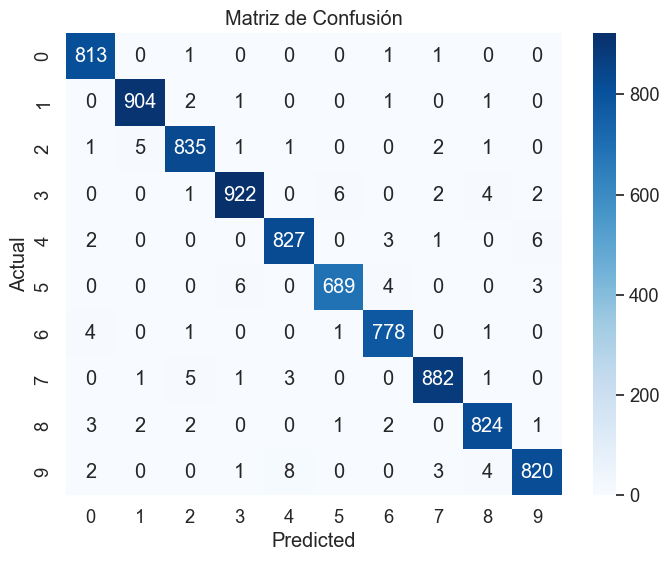

In [22]:
from sklearn.metrics import multilabel_confusion_matrix, classification_report

# Predecir las etiquetas en el conjunto de prueba
y_pred = best_model.predict(X_test)

# Convertir y_test de indicador multiclase a etiquetas enteras
y_test_classes = np.argmax(y_test, axis=1)

# Calcular la matriz de confusión
confusion = confusion_matrix(y_test_classes, y_pred)

# Crear una figura y un eje
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Escala de fuente para una mejor legibilidad

# Crear el mapa de calor de la matriz de confusión
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues")

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Matriz de Confusión")
plt.show()

Como se puede observar el mejor modelo fue utilizando el batch_size de 64, con 20 epocas teniendo un accuracy de casi 0.99 por lo que se puede decir que el modelo es muy bueno. En la matriz de confusion se peude observar que se equivoca en muy pocas ocasiones, por lo que se puede decir que el modelo es muy bueno.

###  Otro algoritmo

Mejores hiperparámetros: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best Model Accuracy: 0.9614285714285714


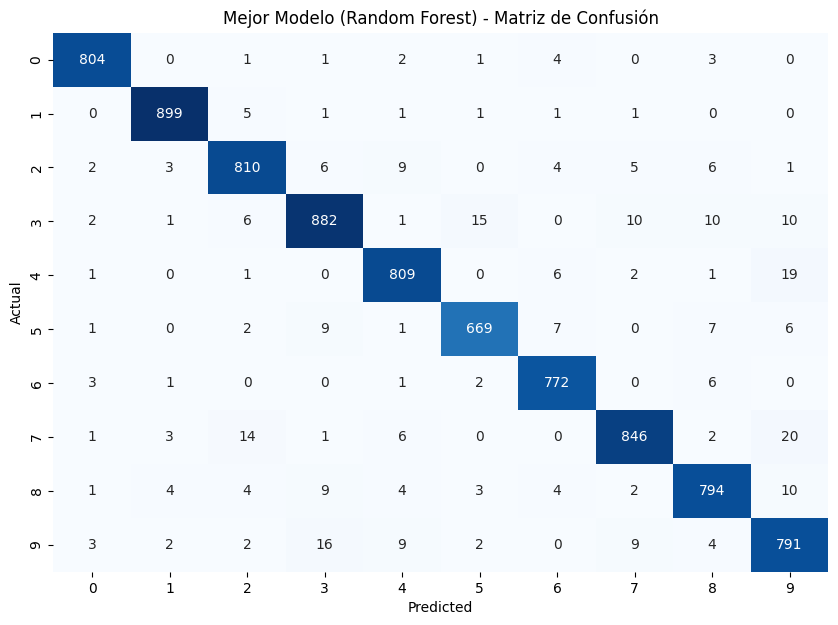

In [4]:
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

model = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(model, param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print("Mejores hiperparámetros:", best_params)

y_pred_best = best_model.predict(X_test)

accuracy_best = accuracy_score(y_test, y_pred_best)
print('Best Model Accuracy:', accuracy_best)

conf_matrix_best = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_best, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Mejor Modelo (Random Forest) - Matriz de Confusión")
plt.show()


Como se puede ver el modelo utilizando 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100, tiene un buen accuracy con 0.96. La matriz de confusion muestra que el modelo predice bien en casi todos los casos, pero se equivoca mas prediciendo el 9, 4.

### Prueba con mejor modelo

En nuestro caso el mejor modelo fue el de Deep Learning, por lo que se procede a realizar la prueba con este modelo.

In [23]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.utils import to_categorical

# Cargar y preparar tus datos, como se muestra en tu código original

# Definir una función para crear el modelo CNN
def create_model(dropout_rate=0.5):
    model = Sequential([
        Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, kernel_size=(3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(dropout_rate),  # Para evitar el sobreajuste
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Entrenar el modelo con los mejores parámetros encontrados
best_model = create_model(dropout_rate=0.5)  # Agrega el dropout_rate adecuado
best_model.fit(X_train, y_train, batch_size=64, epochs=20, verbose=1)

# Evaluar en el conjunto de prueba
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)
print("Precisión en el conjunto de prueba:", test_accuracy)

Epoch 1/20
525/525 [==============================] - 40s 72ms/step - loss: 0.7565 - accuracy: 0.8492
Epoch 2/20
525/525 [==============================] - 53s 101ms/step - loss: 0.1734 - accuracy: 0.9482
Epoch 3/20
525/525 [==============================] - 56s 106ms/step - loss: 0.1196 - accuracy: 0.9636
Epoch 4/20
525/525 [==============================] - 47s 89ms/step - loss: 0.0977 - accuracy: 0.9717
Epoch 5/20
525/525 [==============================] - 37s 70ms/step - loss: 0.0869 - accuracy: 0.9748
Epoch 6/20
525/525 [==============================] - 38s 72ms/step - loss: 0.0743 - accuracy: 0.9784
Epoch 7/20
525/525 [==============================] - 39s 74ms/step - loss: 0.0750 - accuracy: 0.9781
Epoch 8/20
525/525 [==============================] - 38s 72ms/step - loss: 0.0640 - accuracy: 0.9810
Epoch 9/20
525/525 [==============================] - 36s 68ms/step - loss: 0.0584 - accuracy: 0.9819
Epoch 10/20
525/525 [==============================] - 35s 66ms/step - loss: 0.0

In [45]:
import numpy as np
from PIL import Image

images = ['dos.png', 'cuatro.png', 'siete.png', 'tres.png', 'uno.png']

for image in images:

    image_path = "./pruebas/" + image
    image = Image.open(image_path).convert("L").resize((28, 28))
    image_array = np.array(image)

    inverted_image_array = 255 - image_array

    image_input = inverted_image_array.reshape(1, 28, 28, 1)

    y_pred = best_model.predict(image_input)

    predicted_class = np.argmax(y_pred)

    print("Clase predicha:", predicted_class)




1/1 [==============================] - 0s 50ms/step
Clase predicha: 2
1/1 [==============================] - 0s 64ms/step
Clase predicha: 4
1/1 [==============================] - 0s 35ms/step
Clase predicha: 3
1/1 [==============================] - 0s 40ms/step
Clase predicha: 3
1/1 [==============================] - 0s 48ms/step
Clase predicha: 1


Como se puede observar, las preducciones fueron bastante acertadas, con excepcion del numero 7, que como se ve en la matriz de confusion es uno de los que mas errores presenta. Asimiso la forma del dibujo realizado puede no ser la mas adecuada para el modelo, por lo que se podria mejorar el modelo con un mejor dibujo.

# Ejercicio # 2

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.tsa as tsa
import statsmodels as sm
from datetime import datetime
import os
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [47]:
tf.random.set_seed(123)
cuantitativas = ["Gasolina regular", "Gasolina superior", "Diesel alto azufre", "Gas licuado de petróleo", "Total"]
años_dict = {
    '00': '2000', '01': '2001', '02': '2002', '03': '2003', '04': '2004', '05': '2005',
    '06': '2006', '07': '2007', '08': '2008', '09': '2009', '10': '2010', '11': '2011',
    '12': '2012', '13': '2013', '14': '2014', '15': '2015', '16': '2016', '17': '2017',
    '18': '2018', '19': '2019', '20': '2020', '21': '2021', '22': '2022', '23': '2023',
}

meses_dict = {
    'ene': '01', 'feb': '02', 'mar': '03', 'abr': '04', 'may': '05', 'jun': '06',
    'jul': '07', 'ago': '08', 'sep': '09', 'oct': '10', 'nov': '11', 'dic': '12'
}

def dateparse(fecha):
    partes = fecha.split('-')
    partes[0] = meses_dict[partes[0]]
    partes[1] = años_dict[partes[1]]
    return pd.to_datetime('-'.join(partes), format='%m-%Y')

consumo = pd.read_csv('./Data/CONSUMO.csv', parse_dates=['Fecha'], index_col='Fecha',date_parser=dateparse)
print ('\n Parsed Data:')
consumo.head()


# casteamos las variables a float
for col in cuantitativas:
    consumo[col] = consumo[col].str.replace(',', '').astype(float)

train_size = int(len(consumo) * 0.7)
train_consumo, test_consumo = consumo[0:train_size], consumo[train_size:len(consumo)]

tr_consumo = train_consumo.copy()


 Parsed Data:


### Modelo 1

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_consumo)
test_scaled = scaler.transform(test_consumo)

def create_sequences_and_labels(data, seq_length):
    sequences, labels = [], []
    for i in range(len(data) - seq_length):
        seq = data[i:i+seq_length]
        label = data[i+seq_length]
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)

seq_length = 10  
X_train, y_train = create_sequences_and_labels(train_scaled, seq_length)
X_test, y_test = create_sequences_and_labels(test_scaled, seq_length)

# Construir el modelo LSTM 1
model1 = keras.Sequential([
    keras.layers.LSTM(50, activation='relu', input_shape=(seq_length, X_train.shape[2])),
    keras.layers.Dense(1)
])
model1.compile(optimizer='adam', loss='mean_squared_error')
history1 = model1.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))
predictions1 = model1.predict(X_test)

Epoch 1/50
6/6 [==============================] - 5s 127ms/step - loss: 0.1257 - val_loss: 0.8245
Epoch 2/50
6/6 [==============================] - 0s 32ms/step - loss: 0.0505 - val_loss: 0.7035
Epoch 3/50
6/6 [==============================] - 0s 34ms/step - loss: 0.0176 - val_loss: 1.1527
Epoch 4/50
6/6 [==============================] - 0s 39ms/step - loss: 0.0215 - val_loss: 1.2621
Epoch 5/50
6/6 [==============================] - 0s 71ms/step - loss: 0.0179 - val_loss: 0.9506
Epoch 6/50
6/6 [==============================] - 0s 32ms/step - loss: 0.0155 - val_loss: 0.8331
Epoch 7/50
6/6 [==============================] - 0s 48ms/step - loss: 0.0159 - val_loss: 0.8505
Epoch 8/50
6/6 [==============================] - 0s 50ms/step - loss: 0.0154 - val_loss: 0.9289
Epoch 9/50
6/6 [==============================] - 0s 40ms/step - loss: 0.0149 - val_loss: 1.0176
Epoch 10/50
6/6 [==============================] - 0s 38ms/step - loss: 0.0150 - val_loss: 1.0408
Epoch 11/50
6/6 [===========

### Modelo 2

In [49]:
# Construir el modelo LSTM 2
model2 = keras.Sequential([
    keras.layers.LSTM(100, activation='tanh', return_sequences=True, input_shape=(seq_length, X_train.shape[2])),
    keras.layers.LSTM(50, activation='tanh'),
    keras.layers.Dense(1)
])
model2.compile(optimizer='adam', loss='mean_squared_error')
history2 = model2.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))
predictions2 = model2.predict(X_test)

Epoch 1/50
6/6 [==============================] - 12s 472ms/step - loss: 0.0787 - val_loss: 0.6947
Epoch 2/50
6/6 [==============================] - 0s 50ms/step - loss: 0.0353 - val_loss: 0.6913
Epoch 3/50
6/6 [==============================] - 0s 51ms/step - loss: 0.0200 - val_loss: 0.7577
Epoch 4/50
6/6 [==============================] - 0s 51ms/step - loss: 0.0211 - val_loss: 0.6853
Epoch 5/50
6/6 [==============================] - 0s 52ms/step - loss: 0.0160 - val_loss: 0.6874
Epoch 6/50
6/6 [==============================] - 0s 42ms/step - loss: 0.0164 - val_loss: 0.6793
Epoch 7/50
6/6 [==============================] - 0s 40ms/step - loss: 0.0154 - val_loss: 0.6795
Epoch 8/50
6/6 [==============================] - 0s 40ms/step - loss: 0.0151 - val_loss: 0.7085
Epoch 9/50
6/6 [==============================] - 0s 42ms/step - loss: 0.0149 - val_loss: 0.7317
Epoch 10/50
6/6 [==============================] - 0s 43ms/step - loss: 0.0146 - val_loss: 0.7349
Epoch 11/50
6/6 [==========

### Predicciones con ambos modelos

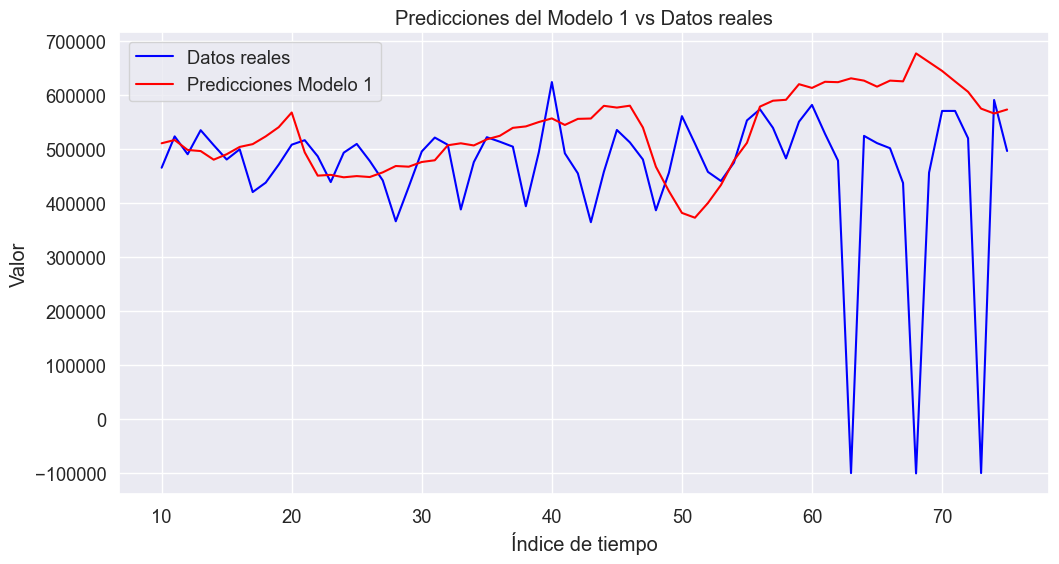

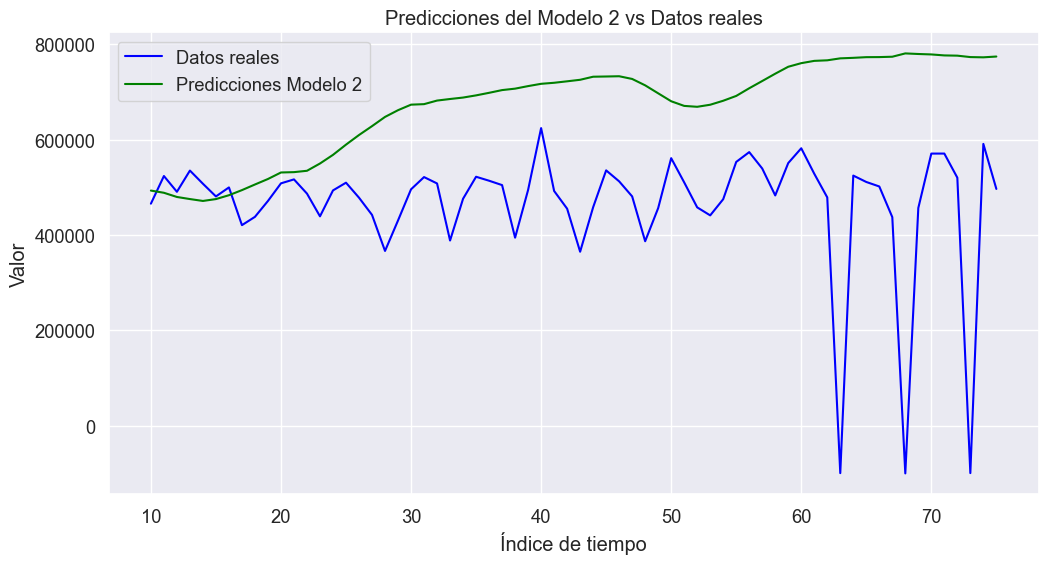

In [50]:
from sklearn.preprocessing import MinMaxScaler

scaler_feature = MinMaxScaler()
scaler_feature.fit(train_consumo[['Gasolina regular']])  

predictions1_original = scaler_feature.inverse_transform(predictions1)
predictions2_original = scaler_feature.inverse_transform(predictions2)
y_test_original = scaler_feature.inverse_transform(y_test)

num_pred_samples = len(y_test_original) - seq_length + 1
indices = range(seq_length, len(y_test_original) + 1) 

predictions1_original = predictions1_original.flatten()[:num_pred_samples]
predictions2_original = predictions2_original.flatten()[:num_pred_samples]

y_test_original = y_test_original.flatten()[:num_pred_samples]

indices = range(seq_length, len(y_test_original) + seq_length)

plt.figure(figsize=(12, 6))
plt.plot(indices, y_test_original, label='Datos reales', color='blue')
plt.plot(indices, predictions1_original, label='Predicciones Modelo 1', color='red')
plt.xlabel('Índice de tiempo')
plt.ylabel('Valor')
plt.title('Predicciones del Modelo 1 vs Datos reales')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(indices, y_test_original, label='Datos reales', color='blue')
plt.plot(indices, predictions2_original, label='Predicciones Modelo 2', color='green')
plt.xlabel('Índice de tiempo')
plt.ylabel('Valor')
plt.title('Predicciones del Modelo 2 vs Datos reales')
plt.legend()
plt.show()


Al analizar las predicciones de los modelos usando LSTM, se puede observar en el gráfico que el modelo que mejor se apega a los valores reales es el modelo 1 ya que sigue una tendencia mas parecida y el modelo 2 se aleja mas a los valores reales.

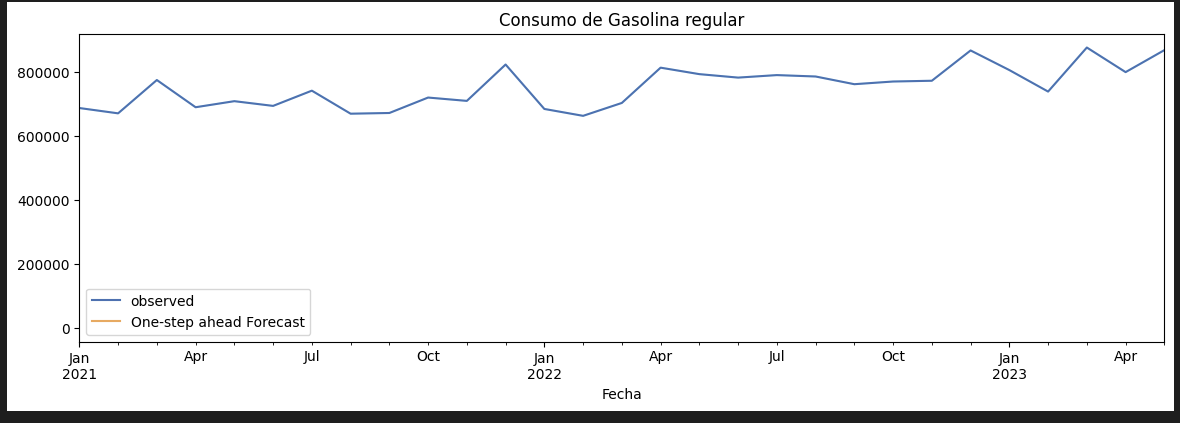

Como se puede observar en la grafica anterior que del modelo realizado en el labraboratorio 2, aunque este si era bueno para predecir, tenia resultados constantes y pocas variaciones, en comparacion al modelo LSTM que si muestra una tendencia mas realista y con variaciones mas notorias, como se puede observar en su grafica, algo que indica que este modelo es mejor para predecir el comportamiento del consumo de gasolina regular con respecto al tiempo.